## Учебник

In [30]:
import os
from datasets import Dataset


data_dir = "../../data/"
textbook_dir = os.path.join(data_dir, "textbook")
chunks = []
for file in sorted(os.listdir(textbook_dir), key=lambda x: int(x.split(".")[0])):
    with open(os.path.join(textbook_dir, file), "r", encoding="utf-8") as f:
        for part in f.read().split("\n\n"):
            chunks.append(part)
len(chunks)

210

In [2]:
import os
from dotenv import load_dotenv

load_dotenv()

token = os.getenv("HF_TOKEN")


from transformers import AutoTokenizer

model_name = "mistralai/Mistral-7B-Instruct-v0.3"
tokenizer = AutoTokenizer.from_pretrained(model_name, token=token)

In [ ]:
import pandas as pd
import numpy as np

ds = Dataset.from_dict({"text": chunks})

ds.save_to_disk(os.path.join(data_dir, "textbook_dataset"))

ds

In [26]:
from datasets import load_from_disk


df = load_from_disk("../../data/textbook_dataset/").to_pandas()

for i, row in df.head().iterrows():
    print(f"obj_{i}")
    print(row["text"].strip())
    print()

obj_0
WHAT IS COGNITIVE BEHAVIOR THERAPY?
A revolution in the field of mental health was initiated in the early 1960s by Aaron T. Beck, MD, then an assistant professor in psychiatry at the University of Pennsylvania. Dr. Beck was a fully trained and practicing psychoanalyst. A scientist at heart, he believed that in order for psychoanalysis to be accepted by the medical community, its theories needed to be demonstrated as empirically valid. In the late 1950s and early 1960s, he embarked on a series of experiments that he fully expected would produce such validation. Instead, the opposite occurred. The results of Dr. Beck's experiments led him to search for other explanations for depression. He identified distorted, negative cognition (primarily thoughts and beliefs) as a primary feature of depression and developed a short-term treatment, one of whose primary targets was the reality testing of patients’ depressed thinking.
Aaron Beck developed a form of psychotherapy in the early 1960s 

## Datasets

In [1]:
import os
from dotenv import load_dotenv
from datasets import (
    load_dataset, 
    DatasetDict,
    Dataset,
)

load_dotenv()

token = os.getenv("HF_TOKEN")

data_dir = "../../data/datasets/"

/mnt/sdb1/home/kygrachev/diploma/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


### "Psychotherapy-LLM/PsychoCounsel-Preference"

In [19]:
ds_name = "Psychotherapy-LLM/PsychoCounsel-Preference"

ds = load_dataset(ds_name)

def mapping_func(example):
    return {
        "text": "PATIENT: " + example["question"] + "\nTHERAPIST: " + example["chosen"]
    }

# Применим функцию ко всем частям датасета
new_dataset = DatasetDict({
    split: ds.map(mapping_func, remove_columns=ds.column_names)
    for split, ds in ds.items()
})

new_dataset

DatasetDict({
    train: Dataset({
        features: ['text'],
        num_rows: 34329
    })
    test: Dataset({
        features: ['text'],
        num_rows: 2324
    })
})

In [20]:
new_dataset.save_to_disk(os.path.join(data_dir, ds_name.replace("/", "-")))

Saving the dataset (1/1 shards): 100%|██████████| 2324/2324 [00:00<00:00, 297899.28 examples/s]


### "entfane/psychotherapy"

In [7]:
ds_name = "entfane/psychotherapy"

ds = load_dataset(ds_name)

def mapping_func(example):
    prefix = {
        "client": "PATIENT: ",
        "therapist": "THERAPIST: ",
    }
    return {
        "text": "\n".join([prefix[row["from"]] + row["value"] for row in example["conversations"]])
    }

# Применим функцию ко всем частям датасета
new_dataset = DatasetDict({
    split: ds.map(mapping_func, remove_columns=ds.column_names)
    for split, ds in ds.items()
})

new_dataset

DatasetDict({
    train: Dataset({
        features: ['text'],
        num_rows: 1260
    })
})

In [8]:
new_dataset.save_to_disk(os.path.join(data_dir, ds_name.replace("/", "-")))

Saving the dataset (1/1 shards): 100%|██████████| 1260/1260 [00:00<00:00, 165259.17 examples/s]


### "mrs83/kurtis_mental_health_final"

In [9]:
ds_name = "mrs83/kurtis_mental_health_final"

ds = load_dataset(ds_name)

def mapping_func(example):
    return {
        "text": "PATIENT: " + example["question"] + "\nTHERAPIST: " + example["answer"]
    }

# Применим функцию ко всем частям датасета
new_dataset = DatasetDict({
    split: ds.map(mapping_func, remove_columns=ds.column_names)
    for split, ds in ds.items()
})

new_dataset

Map: 100%|██████████| 11491/11491 [00:00<00:00, 13554.52 examples/s]


DatasetDict({
    train: Dataset({
        features: ['text'],
        num_rows: 11491
    })
})

In [ ]:
new_dataset.save_to_disk(os.path.join(data_dir, ds_name.replace("/", "-")))

### "tcabanski/mental_health_counseling_responses"

In [30]:
ds_name = "tcabanski/mental_health_counseling_responses"

ds = load_dataset(ds_name)

dct = {}
for split, data in ds.items():
    df = data.to_pandas()
    dct[split] = Dataset.from_pandas(df[~(df["answerText"].isna() | (df["questionText"].isna() & df["questionTitle"].isna()))])

ds = DatasetDict(dct)

def mapping_func(example):
    start = example["questionTitle"]
    text = example["questionText"]
    patient = "PATIENT: "
    if text:
        patient += text
    else:
        patient += start
    
    return {
        "text": patient + "\nTHERAPIST: " + example["answerText"]
    }

# Применим функцию ко всем частям датасета
new_dataset = DatasetDict({
    split: ds.map(mapping_func, remove_columns=ds.column_names)
    for split, ds in ds.items()
})
new_dataset

Map: 100%|██████████| 26036/26036 [00:03<00:00, 8107.37 examples/s]


DatasetDict({
    train: Dataset({
        features: ['text'],
        num_rows: 26036
    })
})

In [ ]:
new_dataset.save_to_disk(os.path.join(data_dir, ds_name.replace("/", "-")))

Saving the dataset (1/1 shards): 100%|██████████| 26036/26036 [00:00<00:00, 489468.63 examples/s]


### "ShenLab/MentalChat16K"

In [34]:
ds_name = "ShenLab/MentalChat16K"

ds = load_dataset(ds_name)

dct = {}
for split, data in ds.items():
    df = data.to_pandas()
    dct[split] = Dataset.from_pandas(df[~df["input"].isna()])

ds = DatasetDict(dct)

def mapping_func(example):
    return {
        "text": "PATIENT: " + example["input"] + "\nTHERAPIST: " + example["output"]
    }

# Применим функцию ко всем частям датасета
new_dataset = DatasetDict({
    split: ds.map(mapping_func, remove_columns=ds.column_names)
    for split, ds in ds.items()
})
new_dataset

Map: 100%|██████████| 16057/16057 [00:01<00:00, 13299.42 examples/s]


DatasetDict({
    train: Dataset({
        features: ['text'],
        num_rows: 16057
    })
})

In [35]:
new_dataset.save_to_disk(os.path.join(data_dir, ds_name.replace("/", "-")))

Saving the dataset (1/1 shards): 100%|██████████| 16057/16057 [00:00<00:00, 346687.91 examples/s]


### "Amod/mental_health_counseling_conversations"

In [36]:
ds_name = "Amod/mental_health_counseling_conversations"

ds = load_dataset(ds_name)

dct = {}
for split, data in ds.items():
    df = data.to_pandas()
    dct[split] = Dataset.from_pandas(df[(df["Context"].str.len() > 0) & (df["Response"].str.len() > 0)])

ds = DatasetDict(dct)

def mapping_func(example):
    return {
        "text": "PATIENT: " + example["Context"] + "\nTHERAPIST: " + example["Response"]
    }

# Применим функцию ко всем частям датасета
new_dataset = DatasetDict({
    split: ds.map(mapping_func, remove_columns=ds.column_names)
    for split, ds in ds.items()
})
new_dataset

Map: 100%|██████████| 3508/3508 [00:00<00:00, 14559.75 examples/s]


DatasetDict({
    train: Dataset({
        features: ['text'],
        num_rows: 3508
    })
})

In [37]:
new_dataset.save_to_disk(os.path.join(data_dir, ds_name.replace("/", "-")))

Saving the dataset (1/1 shards): 100%|██████████| 3508/3508 [00:00<00:00, 283341.07 examples/s]


### С обработкой на эмоции

In [2]:
from inference.classifier import Classifier

class_mapping = {
    0: "admiration",
    1: "anger",
    2: "annoyance",
    3: "disappointment",
    4: "disapproval",
    5: "disgust",
    6: "excitement",
    7: "gratitude",
    8: "joy",
    9: "optimism",
    10: "sadness",
    11: "neutral"
}

clf = Classifier(
    model_name="google-bert/bert-base-uncased",
    model_path="/mnt/sdb1/home/kygrachev/diploma/models/classifier/optimize_levels_on_test/model_best/model.pt",
    class_mapping=class_mapping,
)

In [3]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("mistralai/Mistral-7B-Instruct-v0.3", token=token, use_fast=True)

In [4]:
from datasets import DatasetDict


data_path = "../../data/datasets/"
export_path = "../../data/datasets_emotions/"


def filter_fn(text, min_tok=0, max_tok=2048):
    tokenized = tokenizer(text, truncation=False)
    return min_tok <= len(tokenized["input_ids"]) <= max_tok


def f1(example):
    ask = example["question"]
    return {
        "text": f"PATIENT {clf(ask)}: " + ask + "\nTHERAPIST: " + example["chosen"]
    }


def f2(example):
    prefix = {
        "client": "PATIENT",
        "therapist": "THERAPIST",
    }

    dialogue = []
    for row in example["conversations"]:
        role, ask = prefix.get(row["from"]), row["value"]
        if role == "PATIENT":
            dialogue.append(f"{role} {clf(ask)}: {ask}")
        else:
            dialogue.append(f"{role}: {ask}")
    
    return {"text": "\n".join(dialogue)}


def f3(example):
    ask = example["question"]
    return {
        "text": f"PATIENT {clf(ask)}: " + ask + "\nTHERAPIST: " + example["answer"]
    }


def process_ds(ds_dct, mapping_func, min_tok, max_tok):
    ds_dct = DatasetDict({
        split: ds.map(mapping_func, remove_columns=ds.column_names)
        for split, ds in ds_dct.items()
    })

    for split, ds in ds_dct.items():
        df = ds.to_pandas()
        df = df[df["text"].apply(lambda x: filter_fn(x, min_tok, max_tok))]
        ds_dct[split] = Dataset.from_pandas(df)

    if "test" not in ds_dct:
        shuffled = ds_dct["train"].shuffle(seed=42)
        train_size = int(0.9 * len(shuffled))
        train_dataset = shuffled.select(range(train_size))
        test_dataset = shuffled.select(range(train_size, len(shuffled)))

        ds_dct = DatasetDict({
            "train": train_dataset,
            "test": test_dataset,
        })

    return ds_dct


for ds_name, func, min_tok, max_tok in [
    ("Psychotherapy-LLM/PsychoCounsel-Preference", f1, 16, 1024),
    ("entfane/psychotherapy", f2, 4, 2048),
    ("mrs83/kurtis_mental_health_final", f3, 16, 1024),
]:
    print(ds_name)

    ds_dct = load_dataset(ds_name)
    ds_dct = process_ds(ds_dct, func, min_tok, max_tok)
    ds_dct.save_to_disk(os.path.join(export_path, ds_name))

Psychotherapy-LLM/PsychoCounsel-Preference


Saving the dataset (1/1 shards): 100%|██████████| 2315/2315 [00:00<00:00, 283581.01 examples/s]


entfane/psychotherapy


Saving the dataset (1/1 shards): 100%|██████████| 126/126 [00:00<00:00, 26274.35 examples/s]


mrs83/kurtis_mental_health_final


Saving the dataset (1/1 shards): 100%|██████████| 1149/1149 [00:00<00:00, 116149.02 examples/s]


In [5]:
def f4(example):
    start = example["questionTitle"]
    text = example["questionText"]
    ask = text if text else start
    return {
        "text": f"PATIENT {clf(ask)}: " + ask + "\nTHERAPIST: " + example["answerText"]
    }


def f5(example):
    ask = example["input"]
    return {
        "text": f"PATIENT {clf(ask)}: " + ask + "\nTHERAPIST: " + example["output"]
    }


def f6(example):
    ask = example["Context"]
    return {
        "text": f"PATIENT {clf(ask)}: " + ask + "\nTHERAPIST: " + example["Response"]
    }


# "tcabanski/mental_health_counseling_responses"
ds_name = "tcabanski/mental_health_counseling_responses"
ds_dct = load_dataset(ds_name)
dct = {}
for split, data in ds_dct.items():
    df = data.to_pandas()
    dct[split] = Dataset.from_pandas(df[~(df["answerText"].isna() | (df["questionText"].isna() & df["questionTitle"].isna()))])
ds_dct = DatasetDict(dct)
ds_dct = process_ds(ds_dct, f4, 16, 1024)
ds_dct.save_to_disk(os.path.join(export_path, ds_name))

# "ShenLab/MentalChat16K"
ds_name = "ShenLab/MentalChat16K"
ds_dct = load_dataset(ds_name)
dct = {}
for split, data in ds_dct.items():
    df = data.to_pandas()
    dct[split] = Dataset.from_pandas(df[~df["input"].isna()])
ds_dct = DatasetDict(dct)
ds_dct = process_ds(ds_dct, f5, 16, 1024)
ds_dct.save_to_disk(os.path.join(export_path, ds_name))

# "Amod/mental_health_counseling_conversations"
ds_name = "Amod/mental_health_counseling_conversations"
ds_dct = load_dataset(ds_name)
dct = {}
for split, data in ds_dct.items():
    df = data.to_pandas()
    dct[split] = Dataset.from_pandas(df[(df["Context"].str.len() > 0) & (df["Response"].str.len() > 0)])
ds_dct = DatasetDict(dct)
ds_dct = process_ds(ds_dct, f6, 16, 1024)
ds_dct.save_to_disk(os.path.join(export_path, ds_name))

Saving the dataset (1/1 shards): 100%|██████████| 349/349 [00:00<00:00, 58108.53 examples/s]


In [27]:
from datasets import load_dataset

pths = ["Amod/mental_health_counseling_conversations", "entfane/psychotherapy", "mrs83/kurtis_mental_health_final", "Psychotherapy-LLM/PsychoCounsel-Preference", "ShenLab/MentalChat16K", "tcabanski/mental_health_counseling_responses"]

tt = 0
for pth in pths:
    ds = load_dataset(pth)
    for spl in ds:
        tt += len(ds[spl])
tt

95140

In [28]:
tt = 0
for pth in [
    "Amod-mental_health_counseling_conversations", "entfane-psychotherapy", "mrs83-kurtis_mental_health_final",
    "tcabanski-mental_health_counseling_responses", "ShenLab-MentalChat16K", "Psychotherapy-LLM-PsychoCounsel-Preference"
]:
    ds = load_from_disk("/mnt/sdb1/home/kygrachev/diploma/data/datasets_cleaned/" + pth)
    for spl in ds:
        tt += len(ds[spl])
tt

94991

In [32]:
ds = load_from_disk("/mnt/sdb1/home/kygrachev/diploma/data/datasets_emotions/tcabanski/mental_health_counseling_responses")
df = ds["train"].to_pandas()


for i, row in df[10:20].iterrows():
    print(f"obj_{row['__index_level_0__']}")
    print(row["text"])
    print()

obj_14316
PATIENT ['neutral']: My husband and I are separated. He says he needs some time apart. He says he needs to get back the “in love” part of a relationship but doesn’t want to lose me. Should I wait or start over new?
THERAPIST: I can sense the uncertainty and confusion you're feeling right now. It's completely normal to be unsure about what to do next, especially when it comes to a significant relationship like a marriage.

Firstly, let's acknowledge that your ex-husband's statement about needing time apart and wanting to get back to the "in love" part of the relationship is a bit concerning. It sounds like he's trying to rekindle the romance without fully committing to the changes that led to your separation in the first place.

Here's the thing: you deserve to be in a relationship where you feel seen, heard, and valued. If your ex-husband is genuinely interested in working on the issues that led to your separation, he should be willing to put in the effort to address them and

In [33]:
from datasets import load_from_disk, DatasetDict
from collections import defaultdict


pths = ["Amod/mental_health_counseling_conversations", "entfane/psychotherapy", "mrs83/kurtis_mental_health_final", "Psychotherapy-LLM/PsychoCounsel-Preference", "ShenLab/MentalChat16K", "tcabanski/mental_health_counseling_responses"]


classes_all = {}
for pth in pths:
    ds = load_from_disk("/mnt/sdb1/home/kygrachev/diploma/data/datasets_emotions/" + pth)

    classes = defaultdict(int)
    l = 0
    for split in ds:
        df = ds[split].to_pandas()
        l += len(df)
        for text in df["text"].values:
            for part in text.split("PATIENT "):
                if part:
                    for emo in part[1:].split("]")[0].split(", "):
                        if emo:
                            classes[emo[1:-1]] += 1

    for k, v in classes.items():
        classes[k] = round(v / l * 100, 2)
    
    classes_all[pth] = classes
    print(pth, l, classes)

Amod/mental_health_counseling_conversations 3489 defaultdict(<class 'int'>, {'annoyance': 16.08, 'neutral': 45.51, 'sadness': 20.15, 'anger': 3.53, 'disappointment': 14.7, 'joy': 5.39, 'admiration': 1.61, 'disapproval': 0.03, 'optimism': 3.18, 'disgust': 0.54, 'excitement': 0.4})
entfane/psychotherapy 1260 defaultdict(<class 'int'>, {'annoyance': 33.81, 'disappointment': 47.14, 'sadness': 17.06, 'joy': 5.48, 'gratitude': 18.33, 'neutral': 57.3, 'optimism': 25.87, 'anger': 1.98, 'admiration': 9.37, 'excitement': 3.33, 'disgust': 1.98, 'disapproval': 1.11})
mrs83/kurtis_mental_health_final 11490 defaultdict(<class 'int'>, {'anger': 2.01, 'annoyance': 23.42, 'disappointment': 36.03, 'sadness': 20.14, 'neutral': 23.26, 'optimism': 8.48, 'admiration': 0.69, 'gratitude': 0.38, 'excitement': 0.54, 'disgust': 0.03, 'disapproval': 0.5, 'joy': 1.11})
Psychotherapy-LLM/PsychoCounsel-Preference 36464 defaultdict(<class 'int'>, {'admiration': 2.7, 'disappointment': 19.05, 'sadness': 15.6, 'joy': 4.

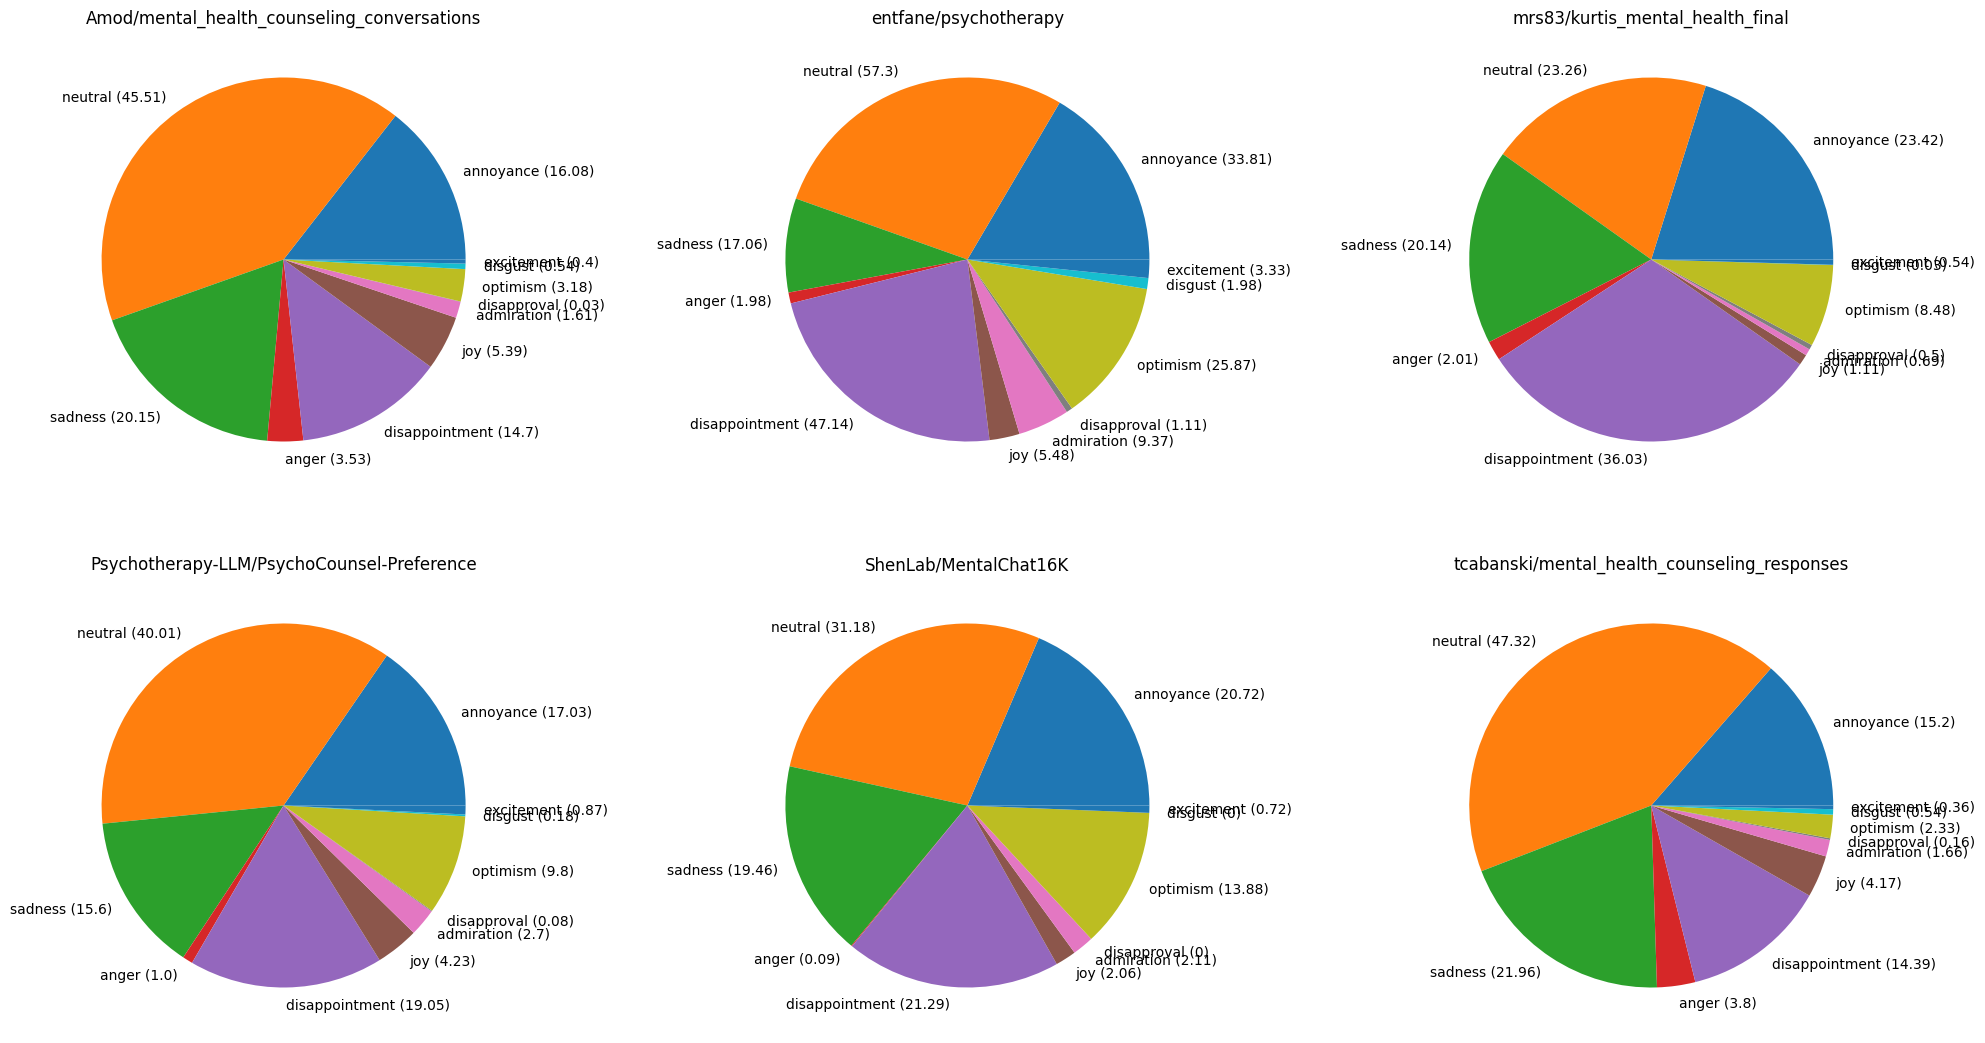

In [34]:
from matplotlib import pyplot as plt


fig, axs = plt.subplots(2, 3)
fig.set_figheight(13)
fig.set_figwidth(25)

labels = classes_all["Amod/mental_health_counseling_conversations"].keys()

def gen():
    for k, v in classes_all.items():
        yield k, v

g = gen()

for row in axs:
    for col in row:
        split, vals = g.__next__()
        nums = [vals[l] for l in labels]
        col.pie(nums, labels=[f"{l} ({n})" for l, n in zip(labels, nums)])
        col.set_title(split)   

plt.show()

In [33]:
import os
import random

from datasets import load_from_disk, DatasetDict
from collections import defaultdict
random.seed(42)

pths = [
    "Amod/mental_health_counseling_conversations", 
    "entfane/psychotherapy", 
    "mrs83/kurtis_mental_health_final", 
    "Psychotherapy-LLM/PsychoCounsel-Preference", 
    "ShenLab/MentalChat16K", 
    "tcabanski/mental_health_counseling_responses",
]

export_path = "../../data/datasets_emotions_cleaned/"

def filter(example):
    txt = example["text"]
    classes = set()
    for part in txt.split("PATIENT "):
        if part:
            for emo in part[1:].split("]")[0].split(", "):
                if emo:
                    classes.add(emo[1:-1])
    
    answer = (len(classes) > 1) or ("neutral" not in classes)
    if not answer:
        answer = random.choice([0, 0, 0, 0, 1]) == 1  # Оставляем 20% нейтральных объектов
    
    return answer


classes_all = {}
ss = 0
for pth in pths:
    ds = load_from_disk("/mnt/sdb1/home/kygrachev/diploma/data/datasets_emotions/" + pth)

    classes = defaultdict(int)
    l, l_before = 0, 0
    for split, data in ds.items():
        l_before += len(data)
        data_new = data.filter(filter)
        ds[split] = data_new
        df = data_new.to_pandas()
        l += len(df)
        for text in df["text"].values:
            for part in text.split("PATIENT "):
                if part:
                    for emo in part[1:].split("]")[0].split(", "):
                        if emo:
                            classes[emo[1:-1]] += 1
    
    # ds.save_to_disk(os.path.join(export_path, pth.replace("/", "-")))
    
    for k, v in classes.items():
        classes[k] = round(v / l * 100, 2)
    ss += l
    classes_all[pth] = classes
    print(pth, l, l_before)
    print(classes)
ss

Amod/mental_health_counseling_conversations 2263 3489
defaultdict(<class 'int'>, {'annoyance': 24.79, 'sadness': 31.06, 'anger': 5.44, 'disappointment': 22.67, 'joy': 8.31, 'admiration': 2.47, 'neutral': 16.0, 'disapproval': 0.04, 'optimism': 4.9, 'disgust': 0.84, 'excitement': 0.62})
entfane/psychotherapy 1187 1260
defaultdict(<class 'int'>, {'annoyance': 35.89, 'disappointment': 50.04, 'sadness': 18.11, 'joy': 5.81, 'gratitude': 19.46, 'neutral': 48.53, 'optimism': 27.46, 'anger': 2.11, 'admiration': 9.94, 'excitement': 3.54, 'disgust': 2.11, 'disapproval': 1.18})
mrs83/kurtis_mental_health_final 9426 11490
defaultdict(<class 'int'>, {'anger': 2.45, 'annoyance': 28.55, 'disappointment': 43.92, 'sadness': 24.55, 'neutral': 6.46, 'optimism': 10.33, 'admiration': 0.84, 'gratitude': 0.47, 'excitement': 0.66, 'disgust': 0.04, 'disapproval': 0.62, 'joy': 1.35})
Psychotherapy-LLM/PsychoCounsel-Preference 25466 36464
defaultdict(<class 'int'>, {'admiration': 3.86, 'disappointment': 27.27, 's

66879

dict_keys(['annoyance', 'sadness', 'anger', 'disappointment', 'joy', 'admiration', 'neutral', 'disapproval', 'optimism', 'disgust', 'excitement'])

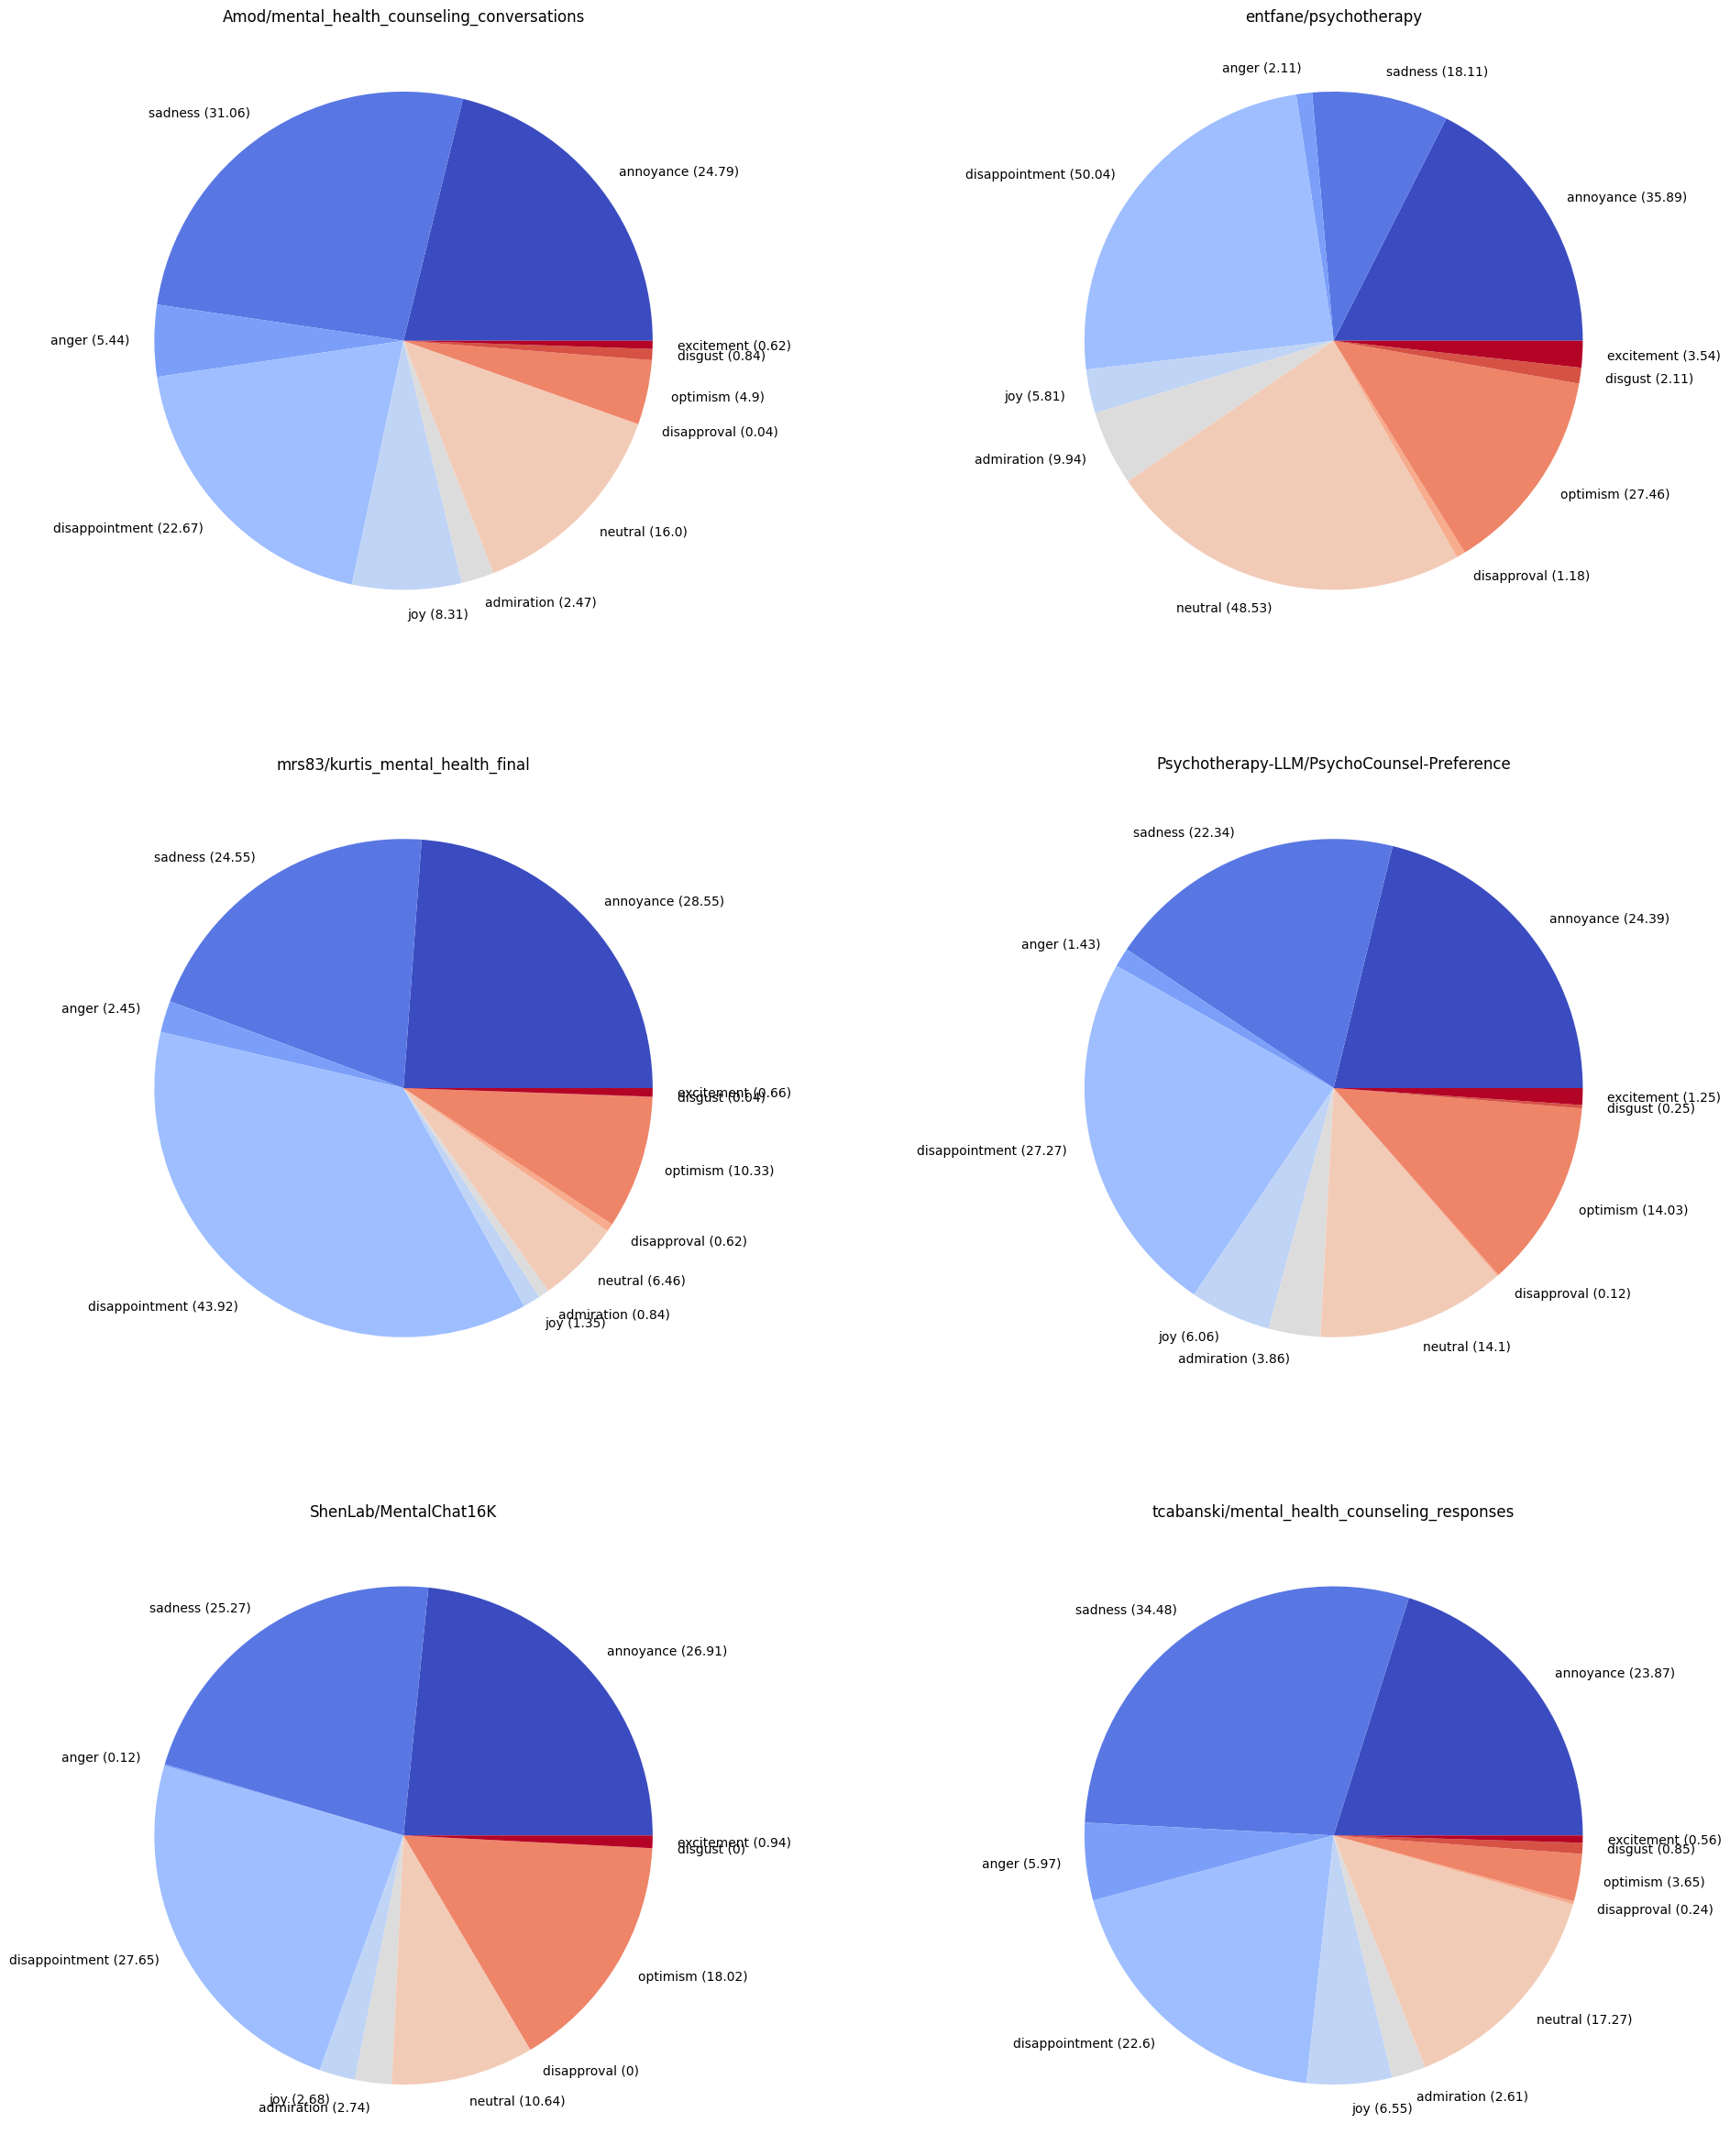

In [45]:
from matplotlib import pyplot as plt
import numpy as np

fig, axs = plt.subplots(3, 2)
fig.set_figheight(30)
fig.set_figwidth(24)

def gen():
    for k, v in classes_all.items():
        yield k, v

g = gen()

labels = list(classes_all["Amod/mental_health_counseling_conversations"].keys())
color_mappings = {l: c for l, c in zip(labels, plt.cm.coolwarm(np.linspace(0, 1, len(labels))))}
clrs = [color_mappings[l] for l in labels]

for row in axs:
    for col in row:
        split, vals = g.__next__()
        nums = [vals[l] for l in labels]
        col.pie(nums, labels=[f"{l} ({n})" for l, n in zip(labels, nums)], colors=clrs)
        col.set_title(split)   

fig.savefig("figure.svg", format="svg")

plt.show()

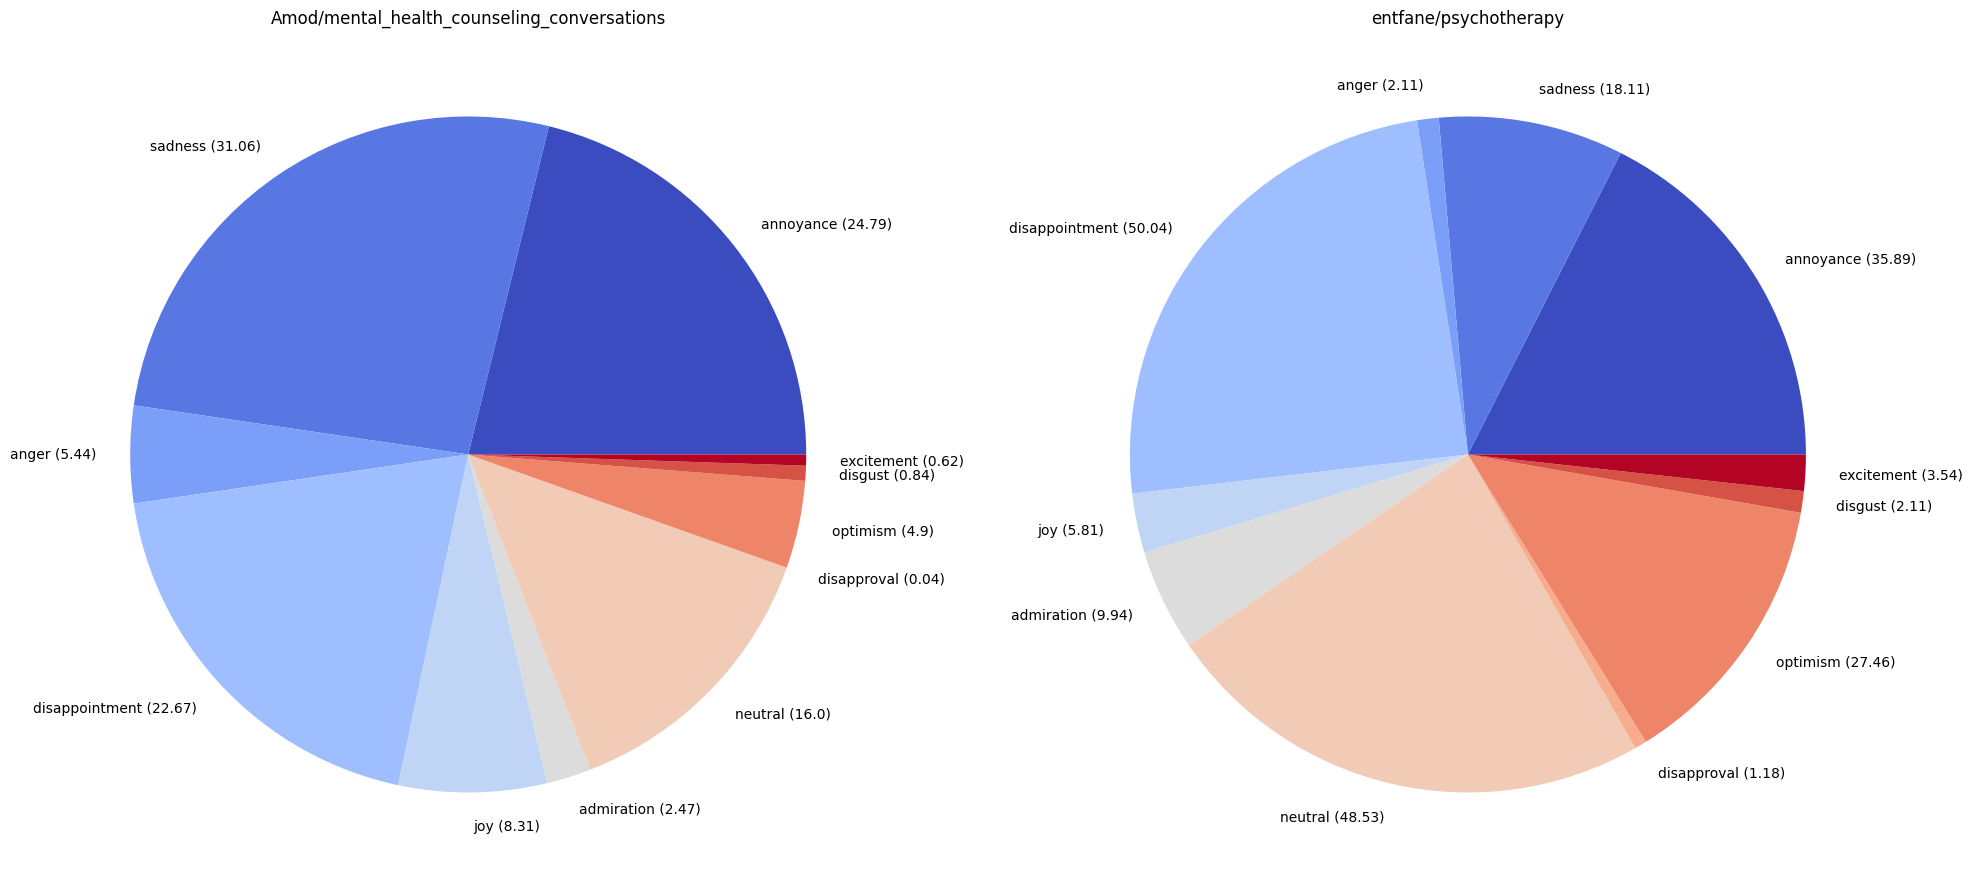

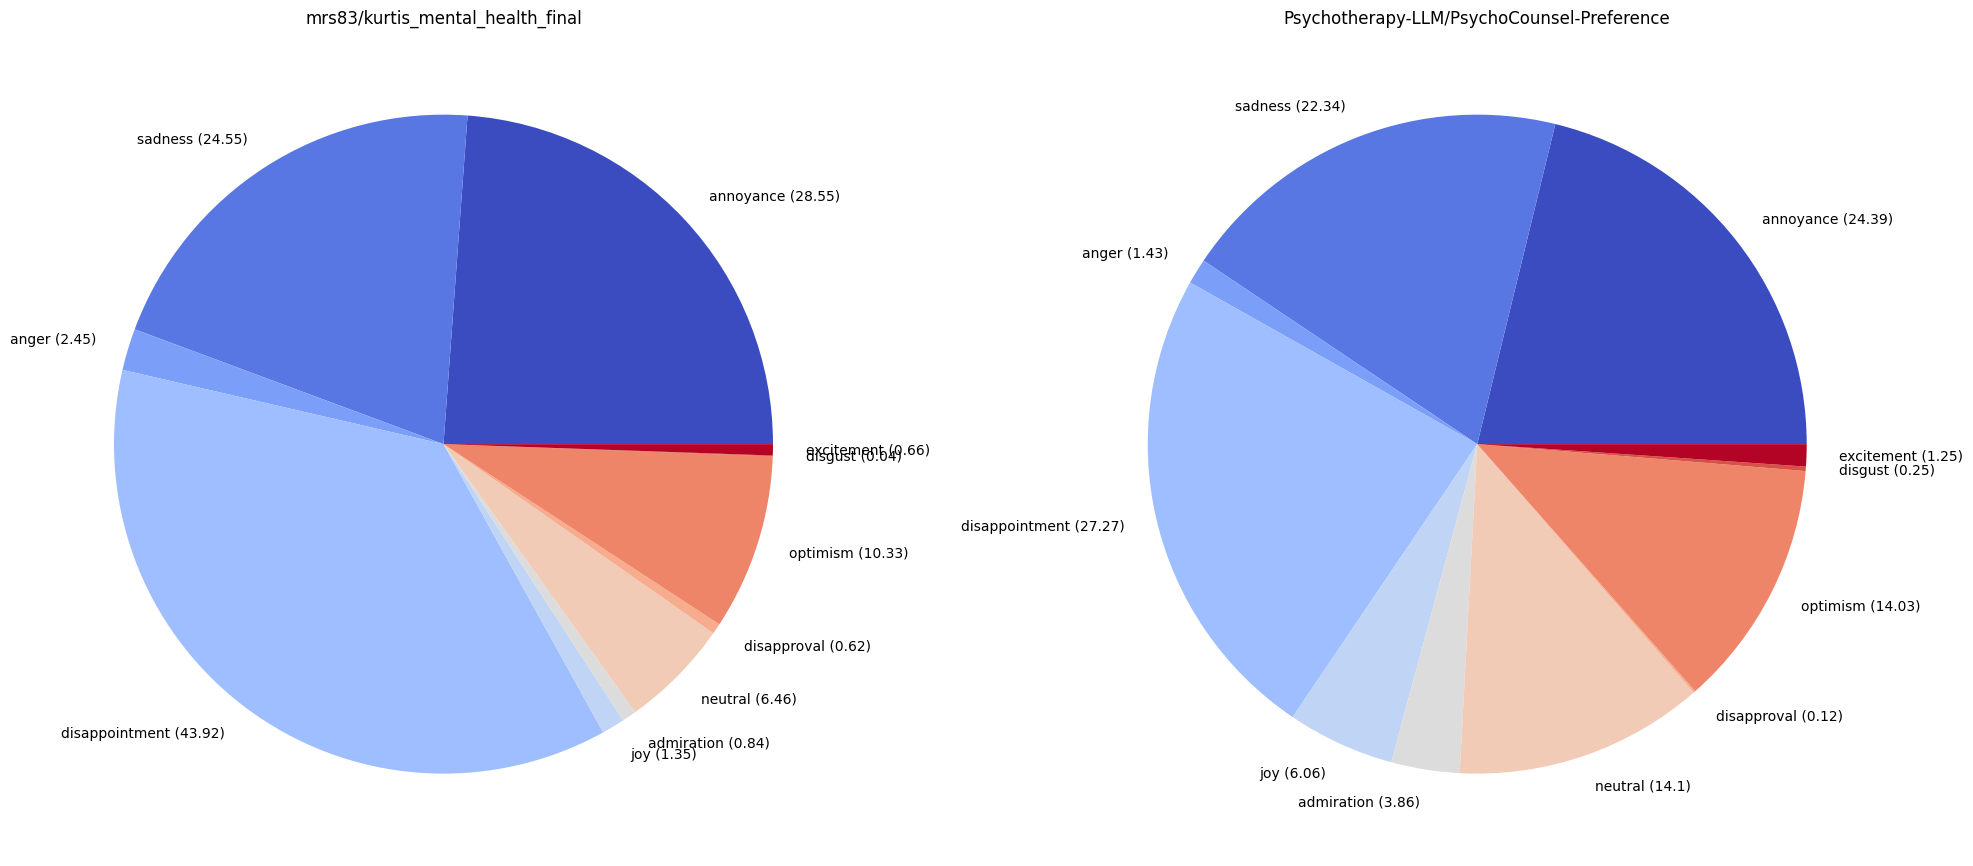

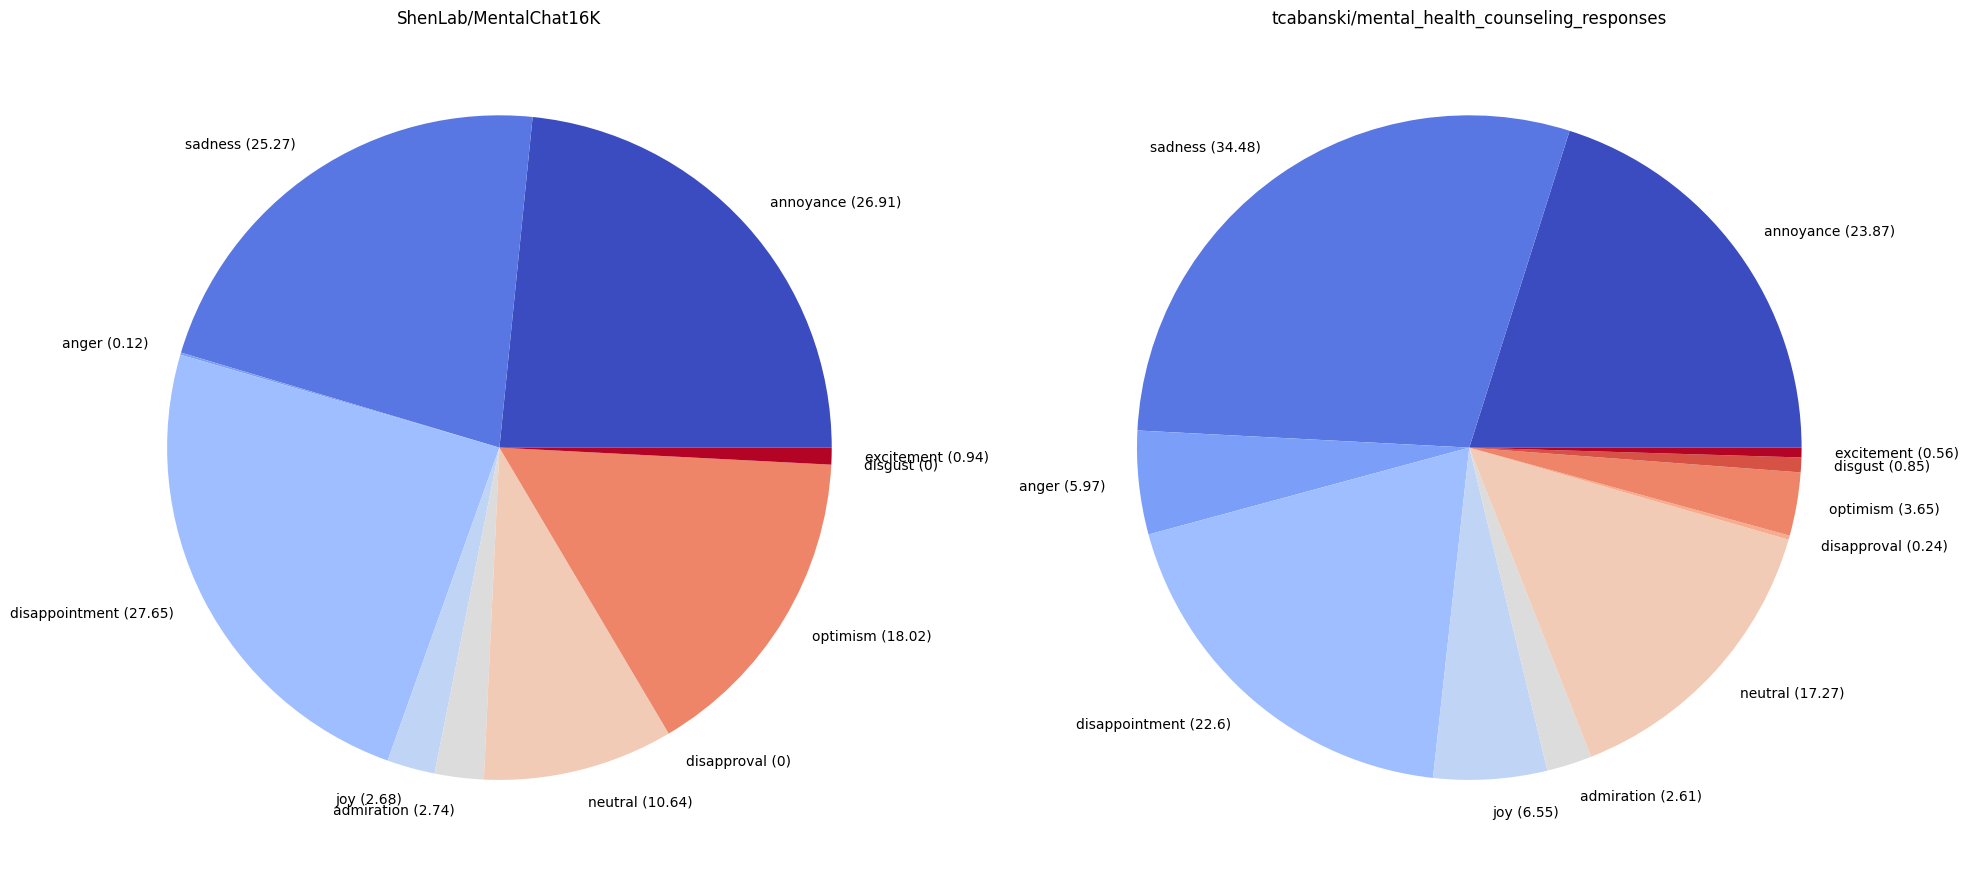

In [53]:
def gen():
    for k, v in classes_all.items():
        yield k, v

g = gen()

labels = list(classes_all["Amod/mental_health_counseling_conversations"].keys())
color_mappings = {l: c for l, c in zip(labels, plt.cm.coolwarm(np.linspace(0, 1, len(labels))))}
clrs = [color_mappings[l] for l in labels]

# Создаём 3 отдельных рисунка с двумя пайчартами каждый
for _ in range(3):
    fig, axs = plt.subplots(1, 2, figsize=(20, 10))  # Один ряд, два столбца
    for ax in axs:
        split, vals = next(g)
        nums = [vals[l] for l in labels]
        ax.pie(nums, labels=[f"{l} ({n})" for l, n in zip(labels, nums)], colors=clrs,
            textprops={'fontsize': 10} )
        ax.set_title(split)
    plt.tight_layout()
    plt.show()

## Все

In [7]:
from datasets import load_from_disk, DatasetDict
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("mistralai/Mistral-7B-Instruct-v0.3", token=token, use_fast=True)
MAX_TOKENS = 2048
data_path = "../../data/datasets/"
export_path = "../../data/datasets_cleaned/"

def filter_fn(example):
    tokenized = tokenizer(example["text"], truncation=False)
    return len(tokenized["input_ids"]) <= MAX_TOKENS

for ds_name in [
    "Amod-mental_health_counseling_conversations", "entfane-psychotherapy", "mrs83-kurtis_mental_health_final",
    "tcabanski-mental_health_counseling_responses", "ShenLab-MentalChat16K", "Psychotherapy-LLM-PsychoCounsel-Preference"
]:
    ds_dct = load_from_disk(data_path + ds_name)
    for split, ds in ds_dct.items():
        ds_dct[split] = ds.filter(filter_fn)
    
    if "test" not in ds_dct:
        shuffled = ds_dct["train"].shuffle(seed=42)
        train_size = int(0.9 * len(shuffled))
        train_dataset = shuffled.select(range(train_size))
        test_dataset = shuffled.select(range(train_size, len(shuffled)))

        ds_dct = DatasetDict({
            "train": train_dataset,
            "test": test_dataset,
        })
    
    ds_dct.save_to_disk(os.path.join(export_path, ds_name))

Saving the dataset (1/1 shards): 100%|██████████| 2324/2324 [00:00<00:00, 148080.74 examples/s]


## google-research-datasets/go_emotions для классификатора

In [4]:
import pandas as pd
import numpy as np


labels = {
  0: "admiration", 1: "amusement", 2: "anger", 3: "annoyance", 4: "approval", 5: "caring", 6: "confusion",
  7: "curiosity", 8: "desire", 9: "disappointment", 10: "disapproval", 11: "disgust", 12: "embarrassment",
  13: "excitement", 14: "fear", 15: "gratitude", 16: "grief", 17: "joy", 18: "love", 19: "nervousness",
  20: "optimism", 21: "pride", 22: "realization", 23: "relief", 24: "remorse", 25: "sadness", 26: "surprise",
  27: "neutral",  # Базовые классы датасета
}

to_kick = {1, 4, 5, 6, 7, 8, 12, 14, 18, 22, 24, 26}  # Классы, подлежащие удалению

concat_mapping = {  # Классы, подлежащие объединению
    19: 3,  # Нервозность в раздражение
    21: 17,  # Гордость в радость
    23: 17,  # Облегчение в радость
    16: 25,  # Горе в грусть
}

good_labels = list(set(labels.keys()) - to_kick - set(concat_mapping.keys()))

shift_rules = {
    i: j for i, j in zip(good_labels, range(len(good_labels)))
}  # Правила упорядочивания нового набора классов

unpack_label = {
    j: labels[i] for i, j in shift_rules.items()
}
repack_label = {
    v: k for k, v in unpack_label.items()
}


def prepare_data(df: pd.DataFrame):
    df.drop_duplicates(subset=["text"], inplace=True)

    df["labels"] = df["labels"].apply(
        lambda x: list({concat_mapping.get(lab, lab) for lab in (set(x) - to_kick)})
    )  # Объединение и удаление классов

    df["text_lens"] = df["text"].apply(lambda x: len(x.split()))
    df["labels_lens"] = df["labels"].apply(len)

    df = (
        df
        .query("labels_lens > 0 and text_lens <= 480")
        .sort_values(by="text_lens", ascending=False)
        .drop(columns=["text_lens", "labels_lens"])
        .reset_index(drop=True)
    )

    def make_labels(labels):
        new_labels = [shift_rules[lab] for lab in labels]  # Упорядочивание нового набора классов
        coded_labels = np.zeros(shape=(len(good_labels), ))
        coded_labels[new_labels] = 1

        return list(coded_labels)

    df["labels"] = df["labels"].apply(make_labels)
    
    mask = df["labels"].apply(lambda x: x[repack_label["neutral"]] == sum(x) == 1)
    df = pd.concat([df[mask].head(int(len(df[mask]) // 2.5)), df[~mask]])
    
    return Dataset.from_pandas(df)

In [5]:
from collections import defaultdict


ds_name = "google-research-datasets/go_emotions"

data = load_dataset(ds_name)

classes, ds_dct = {}, {}
for split in ["train", "test", "validation"]:
    ds = prepare_data(pd.DataFrame(data[split]))
    ds_dct[split] = ds
    df = ds.to_pandas()

    vals = defaultdict(int)
    for row in df["labels"].values:
        for i, v in enumerate(row):
            if v == 1:
                vals[unpack_label[i]] += 1
    classes[split] = vals
classes

{'train': defaultdict(int,
             {'neutral': 6085,
              'anger': 1564,
              'admiration': 4116,
              'joy': 1689,
              'disappointment': 1266,
              'disapproval': 2018,
              'sadness': 1375,
              'excitement': 843,
              'gratitude': 2618,
              'annoyance': 2628,
              'optimism': 1575,
              'disgust': 791}),
 'test': defaultdict(int,
             {'neutral': 767,
              'joy': 183,
              'disgust': 123,
              'disappointment': 151,
              'annoyance': 343,
              'disapproval': 267,
              'anger': 198,
              'sadness': 158,
              'optimism': 186,
              'admiration': 504,
              'gratitude': 351,
              'excitement': 102}),
 'validation': defaultdict(int,
             {'neutral': 754,
              'disappointment': 163,
              'gratitude': 357,
              'optimism': 209,
              'admi

In [30]:
ds_name = "google-research-datasets/go_emotions"

data = load_dataset(ds_name)

In [31]:
data["train"].to_pandas()

,text,labels,id
0,My favourite food is anything I didn't have to cook myself.,[27],eebbqej
1,"Now if he does off himself, everyone will think hes having a laugh screwing with people instead ...",[27],ed00q6i
2,WHY THE FUCK IS BAYLESS ISOING,[2],eezlygj
3,To make her feel threatened,[14],ed7ypvh
4,Dirty Southern Wankers,[3],ed0bdzj
...,...,...,...
43405,Added you mate well I’ve just got the bow and I love the hunting aspect of the game so happily j...,[18],edsb738
43406,Always thought that was funny but is it a reference to anything?,[6],ee7fdou
43407,What are you talking about? Anything bad that happened was [NAME] fault - only good things were ...,[3],efgbhks
43408,"More like a baptism, with sexy results!",[13],ed1naf8


In [ ]:
DatasetDict(ds_dct).save_to_disk(os.path.join(data_dir, "..", ds_name.replace("/", "-")))

Saving the dataset (1/1 shards): 100%|██████████| 2956/2956 [00:00<00:00, 467492.27 examples/s]


In [26]:
pd.set_option("display.max_colwidth", 100)

In [29]:
df = ds_dct["train"].to_pandas()
df["a"] = df["labels"].apply(sum)
df.sort_values(by="a", ascending=False)

,text,labels,id,__index_level_0__,a
10984,"It's my birthday today, so thank you, I guess? I hope something nice happens to you too.","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0]",edavs9q,9525,4.0
11993,Reading this made me pretty damn happy. Congrats hope it works out for you two.,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0]",eeqn6py,11226,4.0
17269,This is so cruel. I literally feel physically sick.,"[0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0]",ee3dzap,20309,4.0
11553,"It's not his fault, it's your wife's. Shes the one you need to be pissed at","[0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",ee6zdni,10492,4.0
5717,I absolutely hate the guy. Can't stand him. But we live in country with laws and he broke none. ...,"[0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",edhh0xw,554,3.0
...,...,...,...,...,...
7917,"Try some other banks, maybe smaller ones, and good luck! Maybe get that deposit up a bit more, a...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]",ed516mx,4328,1.0
7916,The Dude looks great. I always get worried when I see [NAME] play these haggard characters. But ...,"[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",edfxzut,4327,1.0
7915,"Youre not wrong, but that applies to every ad. People are generally getting upset with the messa...","[0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",ee7n9no,4326,1.0
7914,Nothing matters. The world was burning when you came in to it and it will be burning when you le...,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0]",ee7zuwy,4323,1.0


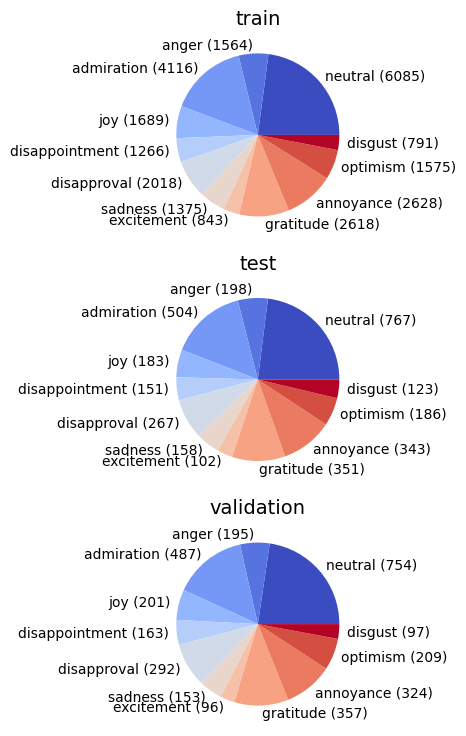

In [14]:
from matplotlib import pyplot as plt


fig, axs = plt.subplots(3, 1)
fig.set_figwidth(16)
fig.set_figheight(9)

labels = classes["train"].keys()
colors = {l: c for l, c in zip(labels, plt.cm.coolwarm(np.linspace(0, 1, len(labels))))}
for ax, (split, vals) in zip(axs, classes.items()):
    nums = [vals[l] for l in labels]
    cs = [colors[l] for l in labels]
    ax.pie(nums, labels=[f"{l} ({n})" for l, n in zip(labels, nums)], colors=cs)
    ax.set_title(split, fontsize=14)
plt.show()